Must import openmc.stats if you want to use the python module for defining distributions

OpenMC website sources:
Info on creating sources in python and in libraries through c++
https://docs.openmc.org/en/stable/usersguide/settings.html

Info on the python api stats module
https://docs.openmc.org/en/stable/pythonapi/stats.html

In [1]:
%matplotlib inline
import openmc
import openmc.stats
import matplotlib.pyplot as plt

In [2]:
# Create concrete 2.4 g/cm3 ksu-triga
concrete = openmc.Material(1, "concrete")
concrete.add_nuclide('H1', 0.022124278629176358, 'wo')
concrete.add_nuclide('H2', 5.085260182774568e-06, 'wo')
concrete.add_nuclide('O16', 0.5741337849554967, 'wo')
concrete.add_nuclide('O17', 0.00023243318540838544, 'wo')
concrete.add_nuclide('Na23', 0.015228206607663967, 'wo')
concrete.add_nuclide('Mg24', 0.0009881580344305626, 'wo')
concrete.add_nuclide('Mg25', 0.0001303189933233482, 'wo')
concrete.add_nuclide('Mg26', 0.00014920508464105143, 'wo')
concrete.add_nuclide('Al27', 0.019979511207438135, 'wo')
concrete.add_nuclide('Si28', 0.2802219547481918, 'wo')
concrete.add_nuclide('Si29', 0.014744102873091395, 'wo')
concrete.add_nuclide('Si30', 0.010065695026852797, 'wo')
concrete.add_nuclide('K39', 0.009347931884719626, 'wo')
concrete.add_nuclide('K40', 1.202883326525966e-06, 'wo')
concrete.add_nuclide('K41', 0.0007092118504431006, 'wo')
concrete.add_nuclide('Ca40', 0.041572369962976224, 'wo')
concrete.add_nuclide('Ca42', 0.00029131919795628164, 'wo')
concrete.add_nuclide('Ca43', 6.223421587373157e-05, 'wo')
concrete.add_nuclide('Ca44', 0.0009839453958409028, 'wo')
concrete.add_nuclide('Ca46', 1.9725318468258845e-06, 'wo')
concrete.add_nuclide('Ca48', 9.622694943654786e-05, 'wo')
concrete.add_nuclide('Fe54', 0.00036377437123526587, 'wo')
concrete.add_nuclide('Fe56', 0.005921721024942872, 'wo')
concrete.add_nuclide('Fe57', 0.00013920443360259695, 'wo')
concrete.add_nuclide('Fe58', 1.885024388560083e-05, 'wo')
concrete.add_element('C', 0.0024873004480166563, 'wo')
concrete.set_density('g/cm3', 2.4)
print(concrete)

Material
	ID             =	1
	Name           =	concrete
	Temperature    =	None
	Density        =	2.4 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	H1             =	0.022124278629176358 [wo]
	H2             =	5.085260182774568e-06 [wo]
	O16            =	0.5741337849554967 [wo]
	O17            =	0.00023243318540838544 [wo]
	Na23           =	0.015228206607663967 [wo]
	Mg24           =	0.0009881580344305626 [wo]
	Mg25           =	0.0001303189933233482 [wo]
	Mg26           =	0.00014920508464105143 [wo]
	Al27           =	0.019979511207438135 [wo]
	Si28           =	0.2802219547481918 [wo]
	Si29           =	0.014744102873091395 [wo]
	Si30           =	0.010065695026852797 [wo]
	K39            =	0.009347931884719626 [wo]
	K40            =	1.202883326525966e-06 [wo]
	K41            =	0.0007092118504431006 [wo]
	Ca40           =	0.041572369962976224 [wo]
	Ca42           =	0.00029131919795628164 [wo]
	Ca43           =	6.223421587373157e-05 [wo]
	Ca44           =	0.0009839453958409028 [wo]
	Ca46       

In [3]:
# Export marterials created to materials.xml
mats = openmc.Materials([concrete])
mats.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material id="1" name="concrete">
    <density units="g/cm3" value="2.4" />
    <nuclide name="H1" wo="0.022124278629176358" />
    <nuclide name="H2" wo="5.085260182774568e-06" />
    <nuclide name="O16" wo="0.5741337849554967" />
    <nuclide name="O17" wo="0.00023243318540838544" />
    <nuclide name="Na23" wo="0.015228206607663967" />
    <nuclide name="Mg24" wo="0.0009881580344305626" />
    <nuclide name="Mg25" wo="0.0001303189933233482" />
    <nuclide name="Mg26" wo="0.00014920508464105143" />
    <nuclide name="Al27" wo="0.019979511207438135" />
    <nuclide name="Si28" wo="0.2802219547481918" />
    <nuclide name="Si29" wo="0.014744102873091395" />
    <nuclide name="Si30" wo="0.010065695026852797" />
    <nuclide name="K39" wo="0.009347931884719626" />
    <nuclide name="K40" wo="1.202883326525966e-06" />
    <nuclide name="K41" wo="0.0007092118504431006" />
    <nuclide name="Ca40" wo="0.041572369962976224" />
    <nuclid

In [4]:
# Create a 100 cm x 100 cm box filled with concrete
box = openmc.model.rectangular_prism(10.0, 10.0, boundary_type='vacuum')
concrete_box = openmc.Cell(fill=concrete, region=box)
root = openmc.Universe(cells=[concrete_box])
geometry = openmc.Geometry(root)
geometry.export_to_xml()
!cat geometry.xml

<?xml version='1.0' encoding='utf-8'?>
<geometry>
  <cell id="1" material="1" region="1 -2 3 -4" universe="1" />
  <surface boundary="vacuum" coeffs="-5.0" id="1" name="minimum x" type="x-plane" />
  <surface boundary="vacuum" coeffs="5.0" id="2" name="maximum x" type="x-plane" />
  <surface boundary="vacuum" coeffs="-5.0" id="3" name="minimum y" type="y-plane" />
  <surface boundary="vacuum" coeffs="5.0" id="4" name="maximum y" type="y-plane" />
</geometry>


In [5]:
# Create settings object and set to fixed source
settings = openmc.Settings()
settings.run_mode = 'fixed source'
batches = 30
settings.batches = batches
settings.particles = 1000

Using openmc.stats to define source distributions
Specifications:
    Source.space - spactial distribution
        openmc.stats.CartesianIndependent(x, y, z)
        openmc.stats.CylindricalIndpedent(r, phi, z, origin=(0,0,0))
        openmc.stats.SphericalIndependent(r, theta, phi, origin=(0,0,0))
        openmc.stats.Box(lower_left, upper_right, only_fissionable=False)
        openmc.stats.Point(xyz=(0,0,0))
    Source.angle (default is Isotropic)
        openmc.stats.PolarAzimuthal(mu=None,phi=None,reference_uvw=(0,0,1))
        openmc.stats.Isotropic()
        openmc.stats.Monodirectional(reference_uvw=[1, 0, 0])
    Source.energy (default Watt) these are all very math heavy
        openmc.stats.Discrete(x,p)
        openmc.stats.Uniform(a=0,b=1)
        openmc.stats.Maxwell(theta)
        openmc.stats.Watt(a=988000, b=2.249E-06)
        openmc.stats.Tabular(x, p, interpolation="linear-linear", ignore_negative=False)
            negative probabilities?
        openmc.stats.Legendre(coefficient)
        openmc.stats.Mixture(probabilities, distribution)
        openmc.stats.Normal(mean_value, std_dev)
        openmc.stats.Muir(e0=14080000, m_rat=5, kt=20000)
    Source.strength - Percent of sites sampled from each source
    Source.partice ('photon', 'neutron') defaults neutron

If those options are not enough to make your source then the c++ external source method is needed
Below is the c++ code for a ring source with a monodirectional angular distributions in the +x direction

#include <cmath> // for M_PI
#include <memory> // for unique_ptr

#include "openmc/random_lcg.h"
#include "openmc/source.h"
#include "openmc/particle.h"

class Source : public openmc::CustomSource
{
  openmc::Particle::Bank sample(uint64_t* seed)
  {
    openmc::Particle::Bank particle;
    // wgt
    particle.particle = openmc::Particle::Type::neutron;
    particle.wgt = 1.0;
    // position
    double angle = 2.0 * M_PI * openmc::prn(seed);
    double radius = 3.0;
    particle.r.x = radius * std::cos(angle);
    particle.r.y = radius * std::sin(angle);
    particle.r.z = 0.0;
    // angle
    particle.u = {1.0, 0.0, 0.0};
    particle.E = 14.08e6;
    particle.delayed_group = 0;
    return particle;
  }
};

// A function to create a unique pointer to an instance of this class when generated
// via a plugin call using dlopen/dlsym.
// You must have external C linkage here otherwise dlopen will not find the file
extern "C" std::unique_ptr<Source> openmc_create_source(std::string parameters)
{
  return std::make_unique<Source>();
}

Below is the CMakeLists.txt file
mkdir build && cd build
cmake ..
make

set

cmake_minimum_required(VERSION 3.3 FATAL_ERROR)
project(openmc_sources CXX)
add_library(source SHARED source_ring.cpp)
find_package(OpenMC REQUIRED HINTS <path to openmc>)
target_link_libraries(source OpenMC::libopenmc)

# Create the external sources
point = openmc.Source()
point.space = openmc.stats.Point((0.0,0.0,0.0))
point.angle = openmc.stats.Isotropic()
point.strength = 0.5

point2 = openmc.Source()
point2.space = openmc.stats.Point((3.0,3.0,0.0))
point2.angle = openmc.stats.Monodirectional([-1.0,0.0,0.0])
point2.strength = 0.5

# Assign the external sources
settings.source = [point, point2]

In [7]:
# Create the custom external source
source = openmc.Source()
source.library = 'build/libsource.so'
settings.source = source

# Export settings to settings.xml
settings.export_to_xml()
!cat settings.xml

<?xml version='1.0' encoding='utf-8'?>
<settings>
  <run_mode>fixed source</run_mode>
  <particles>1000</particles>
  <batches>30</batches>
  <source library="build/libsource.so" strength="1.0" />
</settings>


In [8]:
# Finally, define a mesh tally so that we can see the resulting flux
mesh = openmc.RegularMesh()
mesh.lower_left = (-5.0, -5.0)
mesh.upper_right = (5.0, 5.0)
mesh.dimension = (50, 50)

tally = openmc.Tally()
tally.filters = [openmc.MeshFilter(mesh)]
tally.scores = ['flux']
tallies = openmc.Tallies([tally])
tallies.export_to_xml()
!cat tallies.xml

<?xml version='1.0' encoding='utf-8'?>
<tallies>
  <mesh id="1">
    <dimension>50 50</dimension>
    <lower_left>-5.0 -5.0</lower_left>
    <upper_right>5.0 5.0</upper_right>
  </mesh>
  <filter id="1" type="mesh">
    <bins>1</bins>
  </filter>
  <tally id="1">
    <filters>1</filters>
    <scores>flux</scores>
  </tally>
</tallies>


In [9]:
# Run openmc
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

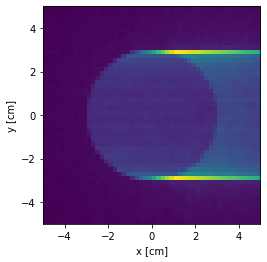

In [10]:
# Get the flux from the statepoint
with openmc.StatePoint('statepoint.{}.h5'.format(batches)) as sp:
    flux = sp.tallies[1].mean
    flux.shape = (50, 50)

# Plot the flux
fig, ax = plt.subplots()
ax.imshow(flux, origin='lower', extent=(-5.0, 5.0, -5.0, 5.0))
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
plt.show()